 # Scaling-up Deep Learning Inference to Large-Scale Bioimage Data (part 1)

## Contact info:
- Fernando Cervantes
- Systems Analyst in JAX's Research IT
- email: fernando.cervantes@jax.org

## Outcomes of this tutorial:
- Learn to use Dask library with Zarr image data
- Implement and apply deep learning inference pipelines with Dask
- Save deep learning inference outputs as Zarr files

---
# Overview of the Dask package

Dask is lazy!

Find more about this [here](https://docs.dask.org/en/stable/array.html)

![image](https://docs.dask.org/en/stable/_images/dask-array.svg)

# 1. Manipulate Dask arrays

## 1.1 Create Dask arrays

- [ ] Create a $10\times10$ dask array of type `int16`, that is formed by chunks of size $5\times5$.

In [16]:
import dask
import dask.array as da
import numpy as np

In [17]:
d1 = da.zeros((10, 10), chunks=(5, 5), dtype=np.int16)

In [18]:
d1

dask.array<zeros_like, shape=(10, 10), dtype=int16, chunksize=(5, 5), chunktype=numpy.ndarray>

- [ ] Modify the content of the dask array using slice selection.

In [19]:
d1[:5, :5] = 1

---
## 1.3 Execute the computation graph

- [ ] Visualize the information of the dask array and note the "**Dask graph**" property.

In [20]:
d1

dask.array<setitem, shape=(10, 10), dtype=int16, chunksize=(5, 5), chunktype=numpy.ndarray>

- [ ] Use the `.compute()` method of the dask array to trigger the actual computation of the instructions.

In [21]:
d1.compute()

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int16)

- [ ] Add more steps to the computation graph.

In [22]:
d1 = d1 + 1

In [23]:
d1

dask.array<add, shape=(10, 10), dtype=int16, chunksize=(5, 5), chunktype=numpy.ndarray>

In [24]:
d2 = da.ones((10, 10), chunks=(3, 3))

In [25]:
d3 = d1 + d2

In [26]:
d3

dask.array<add, shape=(10, 10), dtype=float64, chunksize=(3, 3), chunktype=numpy.ndarray>

- [ ] Inspect the chunks' size of the resulting dask array

In [27]:
d3.chunks

((3, 2, 1, 3, 1), (3, 2, 1, 3, 1))

---
## 1.4 Rechunk Dask arrays

- [ ] Use the `.rechunk(...)` method of the dask array to change the size of each of its chunks.

In [28]:
d3 = d3.rechunk((5, 5))

In [29]:
d3

dask.array<rechunk-merge, shape=(10, 10), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>

In [30]:
d3 = d1 + d2.rechunk(d1.chunks)

In [31]:
d3

dask.array<add, shape=(10, 10), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>

- [ ] Apply some math operations on the dask array using `numpy`.

In [32]:
d3_sum = np.sum(d3)

In [33]:
d3_sum

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [34]:
d3_sum.compute()

np.float64(225.0)

In [35]:
d3_cos = np.cos(d3)

In [36]:
d3_cos

dask.array<cos, shape=(10, 10), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>

In [37]:
d3_cos.compute()

array([[-0.9899925 , -0.9899925 , -0.9899925 , -0.9899925 , -0.9899925 ,
        -0.41614684, -0.41614684, -0.41614684, -0.41614684, -0.41614684],
       [-0.9899925 , -0.9899925 , -0.9899925 , -0.9899925 , -0.9899925 ,
        -0.41614684, -0.41614684, -0.41614684, -0.41614684, -0.41614684],
       [-0.9899925 , -0.9899925 , -0.9899925 , -0.9899925 , -0.9899925 ,
        -0.41614684, -0.41614684, -0.41614684, -0.41614684, -0.41614684],
       [-0.9899925 , -0.9899925 , -0.9899925 , -0.9899925 , -0.9899925 ,
        -0.41614684, -0.41614684, -0.41614684, -0.41614684, -0.41614684],
       [-0.9899925 , -0.9899925 , -0.9899925 , -0.9899925 , -0.9899925 ,
        -0.41614684, -0.41614684, -0.41614684, -0.41614684, -0.41614684],
       [-0.41614684, -0.41614684, -0.41614684, -0.41614684, -0.41614684,
        -0.41614684, -0.41614684, -0.41614684, -0.41614684, -0.41614684],
       [-0.41614684, -0.41614684, -0.41614684, -0.41614684, -0.41614684,
        -0.41614684, -0.41614684, -0.41614684

---
## 1.5 Persist vs Compute

- [ ] Use the `.persist()` method of the dask array to partially compute the operations graph.

In [38]:
d3 = d1 + d2.rechunk((5, 5))

In [39]:
d3

dask.array<add, shape=(10, 10), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>

In [40]:
d3 = d3.persist()

In [41]:
d3

dask.array<add, shape=(10, 10), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>

In [42]:
d3 = d3 + 1

In [43]:
d3

dask.array<add, shape=(10, 10), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>

---

## 1.3 Delayed operations

- [ ] Create a delayed function (decorated with `@dask.delayed`) that can be applied lazily

In [44]:
@dask.delayed
def grid_x(height, width, offset = 0):
    x = np.arange(offset, offset + width)
    return np.tile(x, (height, 1))

@dask.delayed
def grid_y(height, width, offset = 0):
    y = np.arange(offset, offset + height)
    return np.tile(y[:, None], (1, width))

In [45]:
X = grid_x(500, 500)
Y = grid_y(500, 500)

In [46]:
da_X = da.from_delayed(X, (500, 500), dtype=np.float64)

In [47]:
da_Y = da.from_delayed(Y, (500, 500), dtype=np.float64)

In [48]:
da_Z = da_X ** 2 + da_Y ** 2

In [49]:
da_Z

dask.array<add, shape=(500, 500), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

In [50]:
import matplotlib.pyplot as plt

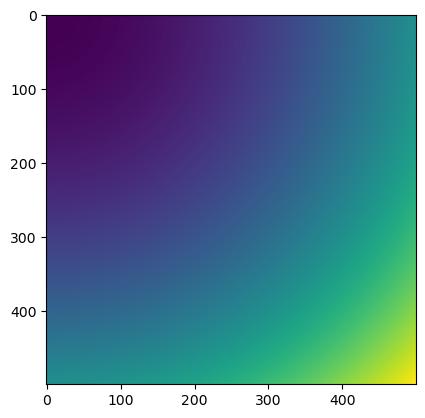

In [51]:
plt.imshow(da_Z)

---
## 1.4 Stack, Concatenate, and Block

In [52]:
da_X_0_0 = da.from_delayed(grid_x(500, 500, 0), (500, 500), dtype=np.float64)

da_Y_0_0 = da.from_delayed(grid_y(500, 500, 0), (500, 500), dtype=np.float64)

da_X_0_1 = da.from_delayed(grid_x(500, 500, 500), (500, 500), dtype=np.float64)

da_Y_1_0 = da.from_delayed(grid_y(500, 500, 500), (500, 500), dtype=np.float64)

In [53]:
da_X_0_0

dask.array<from-value, shape=(500, 500), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

In [54]:
da_X_0 = da.stack((da_X_0_0, da_X_0_1), axis=1)
da_X_0

dask.array<stack, shape=(500, 2, 500), dtype=float64, chunksize=(500, 1, 500), chunktype=numpy.ndarray>

In [55]:
da_X_0 = da.concatenate((da_X_0_0, da_X_0_1), axis=1)
da_X_0

dask.array<concatenate, shape=(500, 1000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

In [56]:
da_X = da.block([[da_X_0_0, da_X_0_1],
                 [da_X_0_0, da_X_0_1]])
da_X

dask.array<concatenate, shape=(1000, 1000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

In [57]:
da_Y = da.block([[da_Y_0_0, da_Y_0_0],
                 [da_Y_1_0, da_Y_1_0]])
da_Y

dask.array<concatenate, shape=(1000, 1000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

In [58]:
da_Z = da_X ** 2 + da_Y ** 2

In [59]:
da_Z

dask.array<add, shape=(1000, 1000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

CPU times: total: 78.1 ms
Wall time: 40.9 ms


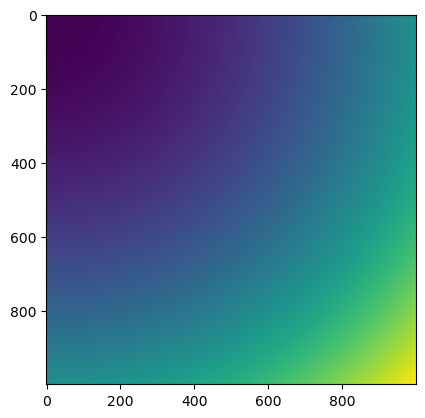

In [60]:
%%time
plt.imshow(da_Z)

CPU times: total: 31.2 ms
Wall time: 24.2 ms


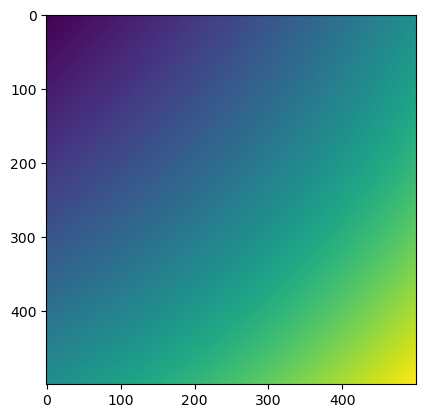

In [61]:
%%time
plt.imshow(da_Z[500:, 500:])

---
# 2. Open Zarr files with Dask

- [ ]  Use the `tifffile` library to open a `.svs` image file, treating it as if it was a `Zarr` file (`aszarr=True`).

In [62]:
import zarr
import tifffile

In [63]:
input_path = r"C:\Users\Public\Documents\WSI_example\CMU-1.svs"

In [64]:
tif_store = tifffile.imread(input_path, aszarr=True)
tif_store

<tifffile.ZarrTiffStore @0x000001F7E255FCD0>

- [ ] Inspect the `ZarrTiffStore` by opening the store object with `zarr.open`

In [65]:
z_grp = zarr.open(tif_store, mode="r")
z_grp.info

Name,/
Type,zarr.hierarchy.Group
Read-only,True
Store type,zarr.storage.KVStore
No. members,3
No. arrays,3
No. groups,0
Arrays,"0, 1, 2"


In [66]:
z_grp["0"].info

Name,/0
Type,zarr.core.Array
Data type,uint8
Shape,"(32914, 46000, 3)"
Chunk shape,"(256, 256, 3)"
Order,C
Read-only,True
Compressor,None
Store type,zarr.storage.KVStore
No. bytes,4542132000 (4.2G)
No. bytes stored,233


- [ ] Use the `Store` object that is returned by `tifffile.imread` with `dask.array.from_zarr` function to open the image as a `dask.array`.

In [67]:
da_arr = da.from_zarr(tif_store, component="0")

In [68]:
da_arr

dask.array<from-zarr, shape=(32914, 46000, 3), dtype=uint8, chunksize=(256, 256, 3), chunktype=numpy.ndarray>

- [ ] Rechunk the image to have chunks of size $512\times512$

In [69]:
da_arr = da_arr.rechunk((512, 512, 3))

In [70]:
da_arr

dask.array<rechunk-merge, shape=(32914, 46000, 3), dtype=uint8, chunksize=(512, 512, 3), chunktype=numpy.ndarray>

- [ ] Extract a window from the image to analyze

In [71]:
offset_y = 16_000
offset_x = 8_000

In [72]:
da_sel = da_arr[offset_y:offset_y + 2048, offset_x:offset_x + 2048]

In [73]:
da_sel

dask.array<getitem, shape=(2048, 2048, 3), dtype=uint8, chunksize=(512, 512, 3), chunktype=numpy.ndarray>

ℹ Dask arrays already work with `matplotlib.pyplot.imshow` without calling `.compute()`

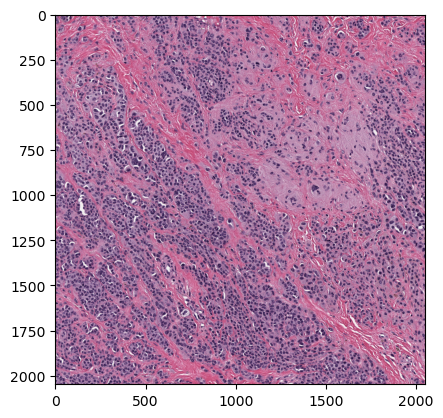

In [74]:
plt.imshow(da_sel)

---
# 3. [Example] Perform image processing on Dask arrays

- [ ] Convert an image region from RGB color to Gray scale.

In [75]:
offset_y = 16_000
offset_x = 8_000

In [76]:
da_sel = da_arr[offset_y:offset_y + 2048, offset_x:offset_x + 2048]

In [77]:
da_sel

dask.array<getitem, shape=(2048, 2048, 3), dtype=uint8, chunksize=(512, 512, 3), chunktype=numpy.ndarray>

In [78]:
from skimage.color import rgb2gray

@dask.delayed
def color2gray(img_chunk):
    return rgb2gray(img_chunk)

In [79]:
da_gray = da.from_delayed(color2gray(da_sel), shape=da_sel.shape[:2], dtype=da_sel.dtype)

In [80]:
da_gray

dask.array<from-value, shape=(2048, 2048), dtype=uint8, chunksize=(2048, 2048), chunktype=numpy.ndarray>

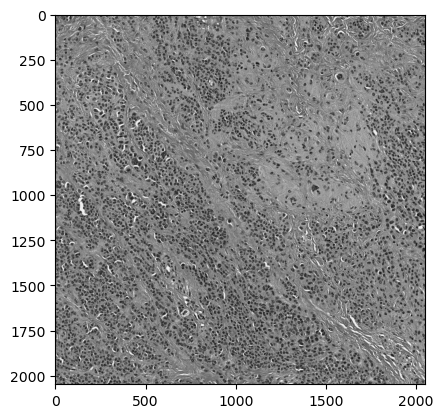

In [81]:
plt.imshow(da_gray, cmap="gray")

---
# 4. [Exercise] Perform image analysis on Dask arrays

- [ ] Implement an object segmentation operation to detect nuclei pixels on a $2048\times2048$ pixels region.
    - [ ] Convert the image region from RGB to Gray
    - [ ] Reduce noise in the image region with a Gaussian Filter
    - [ ] Use a Thresholding algorithm to discriminate between structures given their pixel intensity

ℹ Dask arrays already work with `skimage` functions without calling `.compute()`

In [82]:
offset_y = 16_000
offset_x = 8_000

In [83]:
da_sel = da_arr[offset_y:offset_y + 2048, offset_x:offset_x + 2048]

In [84]:
da_sel

dask.array<getitem, shape=(2048, 2048, 3), dtype=uint8, chunksize=(512, 512, 3), chunktype=numpy.ndarray>

In [85]:
@dask.delayed
def color2gray(img_chunk):
    return rgb2gray(img_chunk)

In [86]:
da_gray = da.from_delayed(color2gray(da_sel), shape=da_sel.shape[:2], dtype=da_sel.dtype)

In [87]:
from dask_image import ndfilters

In [88]:
da_gauss = ndfilters.gaussian(da_gray, 5.0, order=0, mode='reflect', cval=0.0, truncate=4.0)

In [89]:
da_gauss

dask.array<_trim, shape=(2048, 2048), dtype=uint8, chunksize=(2048, 2048), chunktype=numpy.ndarray>

In [90]:
from skimage.filters import threshold_multiotsu

@dask.delayed
def thresholding(img_chunk):
    thresh_levels = threshold_multiotsu(img_chunk, classes=3)
    thresholded_chunk = img_chunk < thresh_levels[0]
    return thresholded_chunk

In [91]:
arr_nuclei = da.from_delayed(thresholding(da_gauss), shape=da_gauss.shape, dtype=bool)

- [ ] Visualize the results using `Matplotlib`

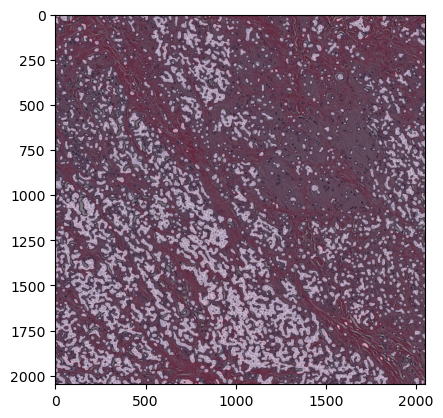

In [92]:
plt.imshow(da_sel)
plt.imshow(arr_nuclei, cmap="gray", alpha=0.5)

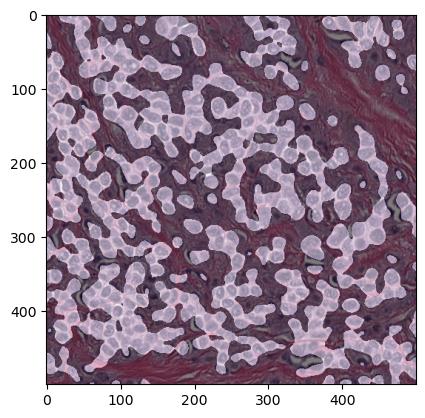

In [93]:
plt.imshow(da_sel[1500:2000, 1000:1500])
plt.imshow(arr_nuclei[1500:2000, 1000:1500], cmap="gray", alpha=0.5)